# Assignment 2 - Introduction to Pandas

Pandas is an important package for data analysis and cleaning.

The data science life cycle consists of many components:

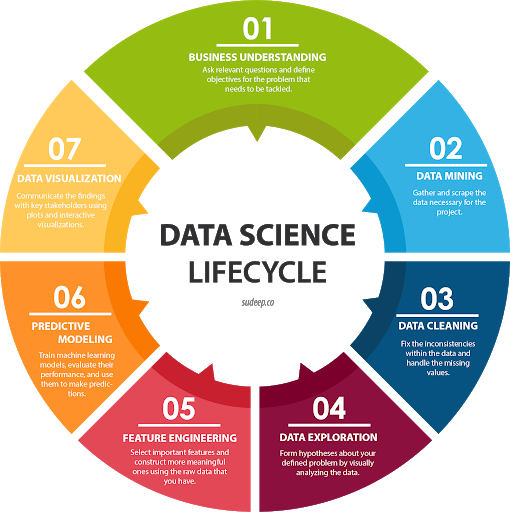

Assuming we have parts 1 and 2 already, Pandas helps us work with Data Cleaning, Data Exploration, and Feature Engineering (Steps 3-5). You can read more about these steps [here](https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6). 


## Part 1

Read parts 1, 2, and 3 of this [tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) to understand how to import datasets (.csv files) in Pandas, Series/ DataFrame objects, row/ column selection, row/ column filtering, and basic functions including (but not limited to):

1. head() 
2. reset_index()
3. groupby() --> and aggregation functions such as computing sum() and max() in grouped DataFrames
4. isna()
5. iloc/ loc
6. merge()
7. concat()
8. value_counts()
9. plot()

In [1]:
# First, we start off by importing the package and setting our data directory
import pandas as pd

data_dir = "Data/"

## Part 2
The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on [All Time Olympic Games Medals](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), and does some basic data cleaning. 

The columns are organized as # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals. Use this dataset to answer the questions below.

In [2]:
df = pd.read_csv(data_dir + 'olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


### Question 0 (Example)

What is the first country in df?

*This function should return a Series.*

In [ ]:
# You should write your whole answer within the function provided.
def answer_zero():
    # This function returns the row for Afghanistan, which is a Series object. The assignment
    # question description will tell you the general format the answer will be in.
    return df.iloc[0]

# You can examine what your function returns by calling it in the cell. 
answer_zero() 

### Question 1
Return the row for the United States.

*This function should return a single row.*

In [ ]:
# Hint: you can find this in one line of code
# Hint: What does df.index tell us?
def answer_one():
    # Your code here
answer_one()

### Question 2

Return the Gold medals for the every country.

*This function should return a single column (pandas Series) with 146 elements.*


In [ ]:
# Hint: you can find this in one line of code
# Hint: Which column is useful in this case?
def answer_two():
    # Your code here
answer_two()

### Question 3
Return the number of Gold medals for the United States only.

*This function should return a single integer.*

In [ ]:
# Hint: Can be answered in 1 line
# Hint: Given the row you have from Question 1, 
# how can you get the value of a specific column?
def answer_three():
    # Your code here
answer_three()

### Question 4
Return the number of Gold medals for the following countries: United States, China, Italy.

*This function should return a pandas Series (single column) with 3 elements.*

In [ ]:
# Hint: Can be answered in 1 line
# Hint: you can find this in one line of code
# Hint: You can filter rows with the isin() function
def answer_four():
    # Your code here
answer_four()

### Question 5
Which country has won the most gold medals in summer games?

*This function should return a single string value.*

In [ ]:
# Hint: can be answered in 1 line
# Hint: check out pandas idxmax() function
def answer_five():
    # Your code here
answer_five()

### Question 6
Which country had the biggest difference between their summer and winter gold medal counts?

*This function should return a single string value.*

In [ ]:
# Hint: you can perform operations on series if they have the same dimension
# Ex: pd.Series([1,2,3]) + pd.Series([1,2,3]) = pd.Series([2,4,6])
def answer_six():
    # Your code here
answer_six()

### Question 7
Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count? 

$$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$

Only include countries that have won at least 1 gold in both summer and winter.

*This function should return a single string value.*

In [ ]:
# Hint: Remember to filter your rows with the condition given above
def answer_seven():
    # Your code here
answer_seven()

### Question 8
Write a function that creates a Series called "Points" which is a weighted value where each gold medal (`Gold.2`) counts for 3 points, silver medals (`Silver.2`) for 2 points, and bronze medals (`Bronze.2`) for 1 point. Add this series to the olympic dataframe. The function should return only the column (a Series object) which you created, with the country names as indices.

*This function should return a Series named `Points` of length 146*

In [ ]:
def answer_eight():
    # Your code here
answer_eight()

## Part 3
For the next set of questions, we will be using census data from the [United States Census Bureau](http://www.census.gov). Counties are political and geographic subdivisions of states in the United States. This dataset contains population data for counties and states in the US from 2010 to 2015. [See this document](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf) for a description of the variable names.

The census dataset (census.csv) should be loaded as census_df. Answer questions using this as appropriate.

In [ ]:
census_df = pd.read_csv(data_dir + 'census.csv')
census_df.head()

### Question 9
Which state has the most counties in it? 
(Hint: Check the SUMLEV key carefully! It's definition is listed in the cell above. Make sure that you are looking at counties only. Which SUMLEV codes indicate that it is a county?)

*This function should return a single string value.*

In [ ]:
# Hint: groupby() function can help you group together counties in a state into a state bin
def answer_nine():  
    # Your code here
answer_nine()

### Question 10
**Only looking at the three most populous counties for each state**, what are the three most populous states (in order of highest population to lowest population)? Use `CENSUS2010POP`.

*This function should return a list of string values.*

In [ ]:
# Hint: make sure to look at the counties with the highest populations
# Hint: pandas sort_values(), groupby(), head() functions may be useful
def answer_ten():
    # Your code here
answer_ten()

### Question 11
In this datafile, the United States is broken up into four regions using the "REGION" column. 

Create a query that finds the counties that belong to regions 1 or 2, whose name starts with 'Washington', and whose POPESTIMATE2015 was greater than their POPESTIMATE 2014.

*This function should return a 5x2 DataFrame with the columns = ['STNAME', 'CTYNAME'] and the same index ID as the census_df (sorted ascending by index).*

In [ ]:
def answer_eleven():
    # Your code here
answer_eleven()

## Part 4
For the next set of questions, we will be using Apple's stock data from [Kaggle](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) to start intial data cleaning and analysis. There is one row per date, and we will be learing how to work with datetime values.

The Apple stock dataset (aapl_us_stocks.txt) should be loaded as apple_df. Answer questions using this as appropriate.

In [ ]:
apple_df = pd.read_csv(data_dir + 'aapl_us_stocks.txt')

### Question 12

Display the first 5 rows of the Apple dataframe

In [ ]:
# Hint: pandas head() function might be useful

# Your code here

### Question 13

What are the maximum and minimum dates represented in this dataframe?

In [ ]:
max_date = # Your code here
min_date = # Your code here

max_date, min_date

### Question 14

Convert the date column into a datetime object. You can save this new Series into a new column called Date_dt. Also create new columns in the dataset for the year and month in integer representation of each row (This can be extracted from the original date value).

For example: the first entry of the DataFrame should look like:
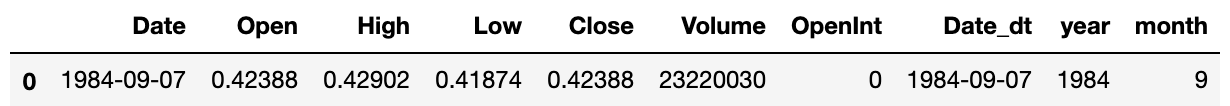

You should end up with 3 new columns in your original DataFrame.

In [ ]:
# Hint: Look into panda's to_datetime function
# Hint: Series.dt might be helpful

# Your code here

### Question 15
Plot the average stock high's and low's for each month. Your result should look like:

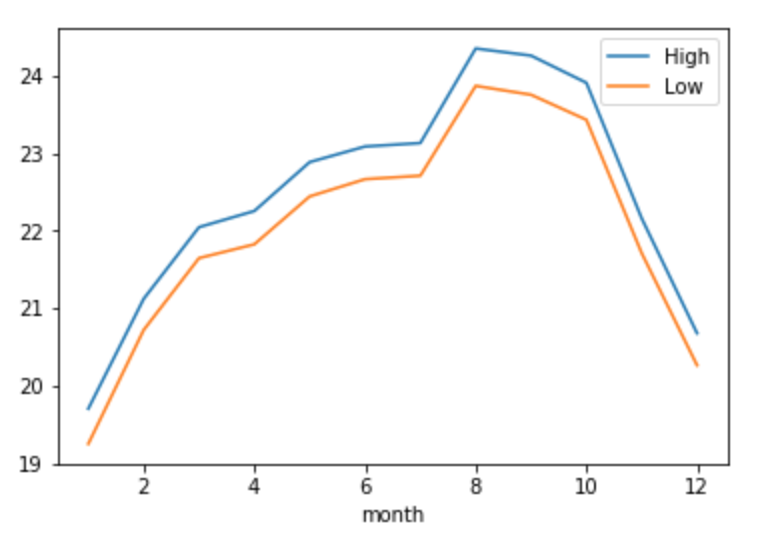

In [ ]:
# Hint: Can you group this data by a common column?
# Hint: Once you group the dataframe, can you apply a function to the grouped data?
# Hint: The pandas plot() function will be useful

# Your code here

### Question 16
Print the number of entries per year in order of lowest to highest. This should return a Series with the year as the index and count of entries as the value.

Example Returned output:

1984     80

2017    218

2001    248

In [ ]:
# Hint: Can be computed in 1 line
# Hint: pandas value_counts() can be useful!

# Your code here